# Network #3


## Network Input:  

YEAR,
MONTH,
DAY,
HOUR,
Neighbourhood (One hot encoded),

## Outputs:

Probability of crime occuring

#### Loading data and creating dataset to be used

##### Importing dataset, creating Date/Time key & adding crime

In [1]:
import pandas as pd
import numpy as np

# File loaded from Github Repo
file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/final_crime.csv'

df = pd.read_csv(file_path)

# Removing invalid points
df = df[pd.isnull(df['NEIGHBOURHOOD']) != pd.isnull(pd.NaT)]


df = df[['YEAR','MONTH','DAY', 'HOUR', 'Neighbourhood', 'Latitude', 'Longitude']] 
print("Shape of Dataset imported for use: " + str(df.shape) + "\n")

print("Sample row")
df.head(1)

Shape of Dataset imported for use: (428141, 7)

Sample row


,YEAR,MONTH,DAY,HOUR,Neighbourhood,Latitude,Longitude
0,2004,10,8,21.0,Fairview,49.265076,-123.118474


In [3]:
# Creating a Key which will be a Date/Time object

print ("------ Adding date-time object as key ------\n")
date_time_col = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY', 'HOUR']])

# Make the added Date the index of the dataset
df['DateTimeMix'] = date_time_col
df.set_index('DateTimeMix', inplace=True)

print("Sample row")
df.head(1)

------ Adding date-time object as key ------

Sample row


,YEAR,MONTH,DAY,HOUR,Neighbourhood,Latitude,Longitude
DateTimeMix,,,,,,,
2004-10-08 21:00:00,2004,10,8,21.0,Fairview,49.265076,-123.118474


In [7]:
df['Crime'] = 1
print("Sample row")
df.head(1)

Sample row


,YEAR,MONTH,DAY,HOUR,Neighbourhood,Latitude,Longitude,Crime
DateTimeMix,,,,,,,,
2004-10-08 21:00:00,2004,10,8,21.0,Fairview,49.265076,-123.118474,1


##### Import Neighbourhoods and Function to generate co-ordinates in neighbourhood

In [5]:
# Import a list of all neighbourhoods and their center co-ordinates in Vancouver

nb_file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/cov_localareas.csv'

neighbourhoods = pd.read_csv(nb_file_path)
print("List of Neighbourhoods : ")
neighbourhoods

List of Neighbourhoods : 


,MAPID,NAME,Latitude,Longitude
0,SUN,Sunset,49.218650,-123.091376
1,MP,Mount Pleasant,49.263060,-123.099888
2,RP,Riley Park,49.244679,-123.103239
3,CBD,Downtown,49.279255,-123.119137
4,KITS,Kitsilano,49.265663,-123.166947
5,DS,Dunbar-Southlands,49.242361,-123.185280
6,KERR,Kerrisdale,49.225466,-123.157878
7,AR,Arbutus-Ridge,49.245938,-123.160737
8,WPG,West Point Grey,49.265928,-123.202077
9,MARP,Marpole,49.210702,-123.130159


##### Import Graffiti and Function to get distance from Graffiti

##### Import Drinking fountain and Function to get distance from Drinking fountain

#### Upsample every 1 Hour and add data points

In [10]:
print("Shape of Dataset before upsample: " + str(df.shape) + "\n")

for i in neighbourhoods['NAME']:
    subset = df[df['Neighbourhood'] == i]
    crime_extra = subset.groupby(level=0).count().resample('1H').asfreq()
    crime_extra = crime_extra[pd.isna((crime_extra['Crime']))]
  
    if(crime_extra.shape[0] != 0 ):
        crime_extra['Crime'] = 0
        crime_extra['YEAR'] = crime_extra.index.year
        crime_extra['MONTH'] = crime_extra.index.month
        crime_extra['DAY'] = crime_extra.index.day
        crime_extra['HOUR'] = crime_extra.index.hour

        crime_extra['Neighbourhood'] = i


        df = df.append(crime_extra)
        
print("Shape of Dataset after upsample: " + str(df.shape) + "\n")

Shape of Dataset before upsample: (2691438, 8)

Shape of Dataset after upsample: (2691438, 8)



In [0]:
# print("Shape of Original Dataset: " + str(df.shape) + "\n")

# df = df.append(df_extra)

# print("Shape of Upsampled Dataset with No crime values: " + str(df.shape) + "\n")

#### Extract network input and output and make sets

In [0]:
Y = df['Crime'].values
# X = df[['YEAR','MONTH','DAY', 'HOUR', 'Latitude', 'Longitude', 'Graffiti', 'Drinking_Fountain']].values

neigh = df['Neighbourhood']
onehot_neigh = pd.get_dummies(neigh)
X = np.concatenate((df[['YEAR','MONTH','DAY', 'HOUR']].values, onehot_neigh.values), axis = 1)

In [0]:
X[0]

array([2.004e+03, 1.000e+01, 8.000e+00, 2.100e+01, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00])

In [0]:
Y[0]

1

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X)
X = scaler.transform(X)
print(X[0])

[0.         0.81818182 0.23333333 0.91304348 0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

print("Training Data Size: " + str(X_train.shape))
print("Testing Data Size:" + str(X_test.shape))
print("Training Label Size: " + str(Y_train.shape))
print("Testing Label Size: " + str(Y_test.shape))

Training Data Size: (2153150, 26)
Testing Data Size:(538288, 26)
Training Label Size: (2153150,)
Testing Label Size: (538288,)


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot loss and accuracy vs epochs
def loss_curve(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  x_axis     = range(1, len(history.history['loss'])+1)
  
  plt.figure()
  plt.plot(x_axis, train_loss, label="Training Loss")
  plt.plot(x_axis, val_loss, label="Validation Loss")
  plt.ylabel('Loss Value')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Loss')
  plt.legend()
  
def accuracy(history):
  acc  = history.history['acc']
  val_acc = history.history['val_acc']
  x_axis     = range(1, len(history.history['acc'])+1)
  
  plt.figure()
  plt.plot(x_axis, np.dot(acc,100), label="Accuracy")
  plt.plot(x_axis, np.dot(val_acc, 100), label="Validation Accuracy")
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Accuracy')
  plt.legend()

#### Training Network

In [15]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1], ) ) )
model.add(Dense(128, activation='relu') )
model.add(Dense(512, activation='relu') )
model.add(Dense(128, activation='relu') )
model.add(Dense(64, activation='relu') )


model.add(Dense(1, activation='sigmoid') )

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1728      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 150,081
Trainable params: 150,081
Non-trainable params: 

In [16]:
history = model.fit(X_train, Y_train,
          epochs = 15,
          batch_size=512,
          validation_split=0.2,
          verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 1722520 samples, validate on 430630 samples
Epoch 1/15
1722520/1722520 [==============================] - 17s 10us/step - loss: 0.3646 - acc: 0.8579 - val_loss: 0.3635 - val_acc: 0.8574
Epoch 2/15
1722520/1722520 [==============================] - 14s 8us/step - loss: 0.3601 - acc: 0.8589 - val_loss: 0.3593 - val_acc: 0.8594
Epoch 3/15
1722520/1722520 [==============================] - 16s 9us/step - loss: 0.3594 - acc: 0.8590 - val_loss: 0.3593 - val_acc: 0.8590
Epoch 4/15
1722520/1722520 [==============================] - 14s 8us/step - loss: 0.3592 - acc: 0.8590 - val_loss: 0.3605 - val_acc: 0.8591
Epoch 5/15
1722520/1722520 [==============================] - 14s 8us/step - loss: 0.3590 - acc: 0.8592 - val_loss: 0.3591 - val_acc: 0.8592
Epoch 6/15
1722520/1722520 [==============================] - 14s 8us/step - loss: 0.3589 - acc: 0.8591 - val_loss: 0.3592 - val_acc: 0.8593
Epoch 7/15
1722520/1722520 [========================

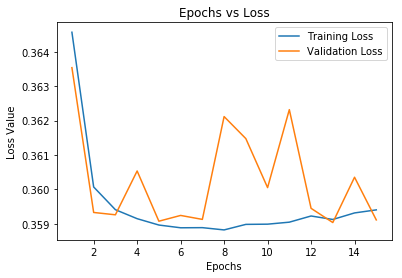

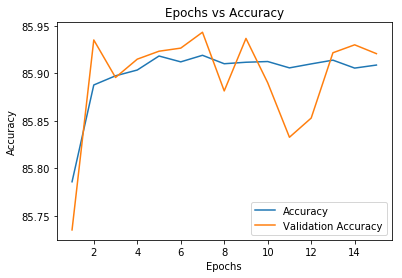

In [17]:
loss_curve(history)
accuracy(history)

In [0]:
labels = list(onehot_neigh.columns.values)

test_loss, test_acc = model.evaluate(X_test, Y_test)
y_pred = model.predict(X_test)


print("Test Loss: " + str(test_loss))
print("Test Accuracy: " + str(test_acc) + "\n")


538288/538288 [==============================] - 20s 38us/step
Test Loss: 0.3633678653892147
Test Accuracy: 0.8568238563742829



In [0]:
# Predicting for random year/month/day/hour

# test = np.array([[2019, 2, 11, 3, 49.237994, -123.083282, DistanceToGraffiti(49.237994, -123.083282), DistanceToFountain(49.237994, -123.083282)]])

test = np.array([[2019, 2, 11, 3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

test = scaler.transform(test)
ans = model.predict(test)
ans

array([[0.05801033]], dtype=float32)

In [0]:
# Predicting for another random year/month/day/hour

# test = np.array([[2012, 6, 4,15, 49.238019, -123.163815, DistanceToGraffiti(49.238019, -123.163815), DistanceToFountain(49.238019, -123.163815)]])
test = np.array([[2019, 2, 11, 12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]])
test = scaler.transform(test)
ans = model.predict(test)
ans

array([[0.05943623]], dtype=float32)

In [0]:
# Predict crime in a location over the whole day
for i in range(0, 24):
#   test = np.array([[2012, 1, 1, i, 49.284645, -123.136306, DistanceToGraffiti(49.284645, -123.136306), DistanceToFountain(49.284645, -123.136306)]])
  test = np.array([[2005, 12,31, i,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

  test = scaler.transform(test)
  ans = model.predict(test)
  print("Likelihood of crime at " + str(i) + " hour: " + str(ans[0][0]*100) + " %") 

Likelihood of crime at 0 hour: 30.23408353328705 %
Likelihood of crime at 1 hour: 22.93020635843277 %
Likelihood of crime at 2 hour: 13.331630825996399 %
Likelihood of crime at 3 hour: 8.529111742973328 %
Likelihood of crime at 4 hour: 6.900174170732498 %
Likelihood of crime at 5 hour: 7.874668389558792 %
Likelihood of crime at 6 hour: 9.083171933889389 %
Likelihood of crime at 7 hour: 10.469596087932587 %
Likelihood of crime at 8 hour: 12.503057718276978 %
Likelihood of crime at 9 hour: 13.86326253414154 %
Likelihood of crime at 10 hour: 14.858576655387878 %
Likelihood of crime at 11 hour: 16.048644483089447 %
Likelihood of crime at 12 hour: 17.49309003353119 %
Likelihood of crime at 13 hour: 19.071513414382935 %
Likelihood of crime at 14 hour: 21.921277046203613 %
Likelihood of crime at 15 hour: 24.97250735759735 %
Likelihood of crime at 16 hour: 27.56119668483734 %
Likelihood of crime at 17 hour: 30.3983211517334 %
Likelihood of crime at 18 hour: 32.503095269203186 %
Likelihood of c

In [0]:
labels

['Arbutus-Ridge',
 'Downtown',
 'Dunbar-Southlands',
 'Fairview',
 'Grandview-Woodland',
 'Hastings-Sunrise',
 'Kensington-Cedar Cottage',
 'Kerrisdale',
 'Killarney',
 'Kitsilano',
 'Marpole',
 'Mount Pleasant',
 'Oakridge',
 'Renfrew-Collingwood',
 'Riley Park',
 'Shaughnessy',
 'South Cambie',
 'Strathcona',
 'Sunset',
 'Victoria-Fraserview',
 'West End',
 'West Point Grey']